In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/omerc/Documents/Machine Learning Project Basic - Linear Regression"))

# Any results you write to the current directory are saved as output.

['Ecommerce Customers']


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
customers = pd.read_csv('C:/Users/omerc/Documents/Machine Learning Project Basic - Linear Regression/Ecommerce Customers')


In [23]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [24]:
customers.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [26]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

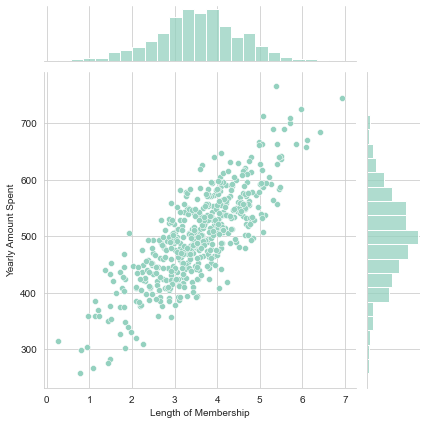

In [30]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)


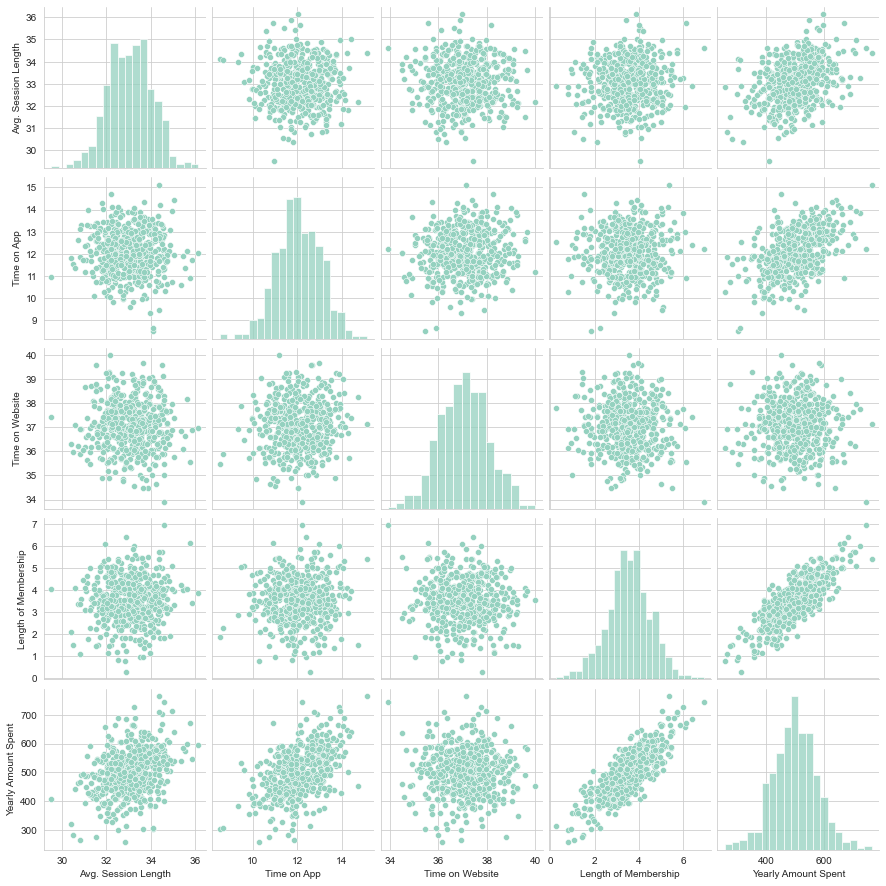

In [31]:
sns.pairplot(customers)
#Based off this plot what looks to be the most correlated feature with Yearly Amount Spent

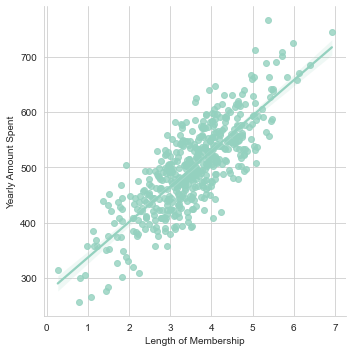

In [32]:
#Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [33]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [36]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [39]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [59]:
cdf= pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [60]:
cdf
#1 uniit change in Yearly Amount Spent will change 25.981550 units in Avg. Session Length

,coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [61]:
#predict - Predicted values based on linear model object (lm).
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

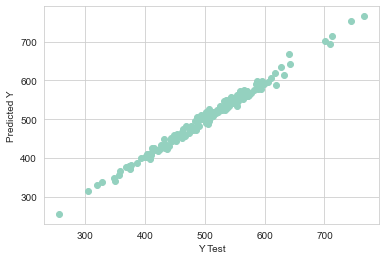

In [65]:
plt.scatter(y_test,predictions)#compare the y_test (actual lables), to the predictions (predicted from x_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [67]:
from sklearn import metrics

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE :   7.228148653430841
MSE :   79.8130516509744
RMAE :   8.933815066978632


C:\Users\omerc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

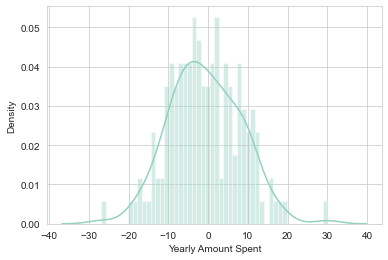

In [68]:
sns.distplot(y_test - predictions,bins=50)